In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [129]:
marketing_data = pd.read_csv("marketing_data.csv")
pd.set_option('display.max_columns', None)
marketing_data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [130]:
marketing_data.shape

(2240, 28)

In [131]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [132]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [133]:
# see what columns have missing data
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [134]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

In [135]:
#taking dollar sign out of values
marketing_data.Income = marketing_data.Income.replace('[\$,]','', regex=True)

marketing_data.head()

<unknown>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<ipython-input-135-b5fd7c11ac55>:2: SyntaxWarning: invalid escape sequence '\$'
  marketing_data.Income = marketing_data.Income.replace('[\$,]','', regex=True)


,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.00,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.00,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.00,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [136]:
#convert income from object to float
marketing_data['Income'] = marketing_data['Income'].astype(float)
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   YearBirth            2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   MaritalStatus        2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   DtCustomer           2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProducts      2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [137]:
# replace missing values with the mean income
marketing_data.Income = marketing_data.Income.fillna(marketing_data.Income.mean())

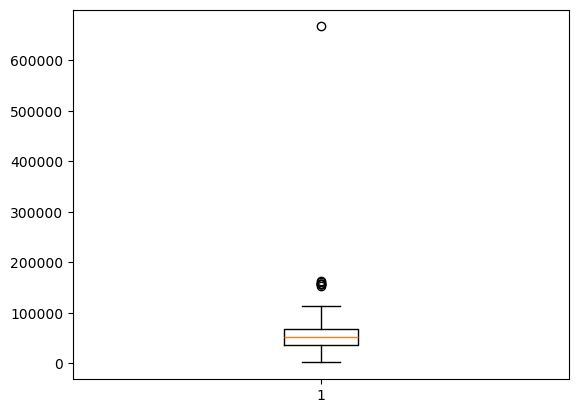

In [138]:
plt.figure()
plt.boxplot(marketing_data.Income)
plt.show()

In [139]:
# remove incomes below 300000
marketing_data = marketing_data[marketing_data.Income<300000]

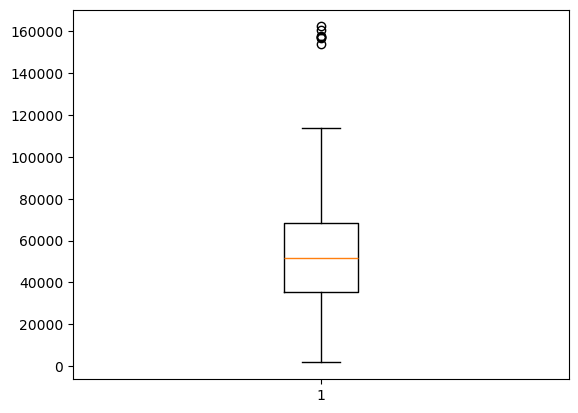

In [140]:
plt.figure()
plt.boxplot(marketing_data.Income)
plt.show()

In [141]:
#adding an age column 
marketing_data['Age'] = 2025 - marketing_data['YearBirth']

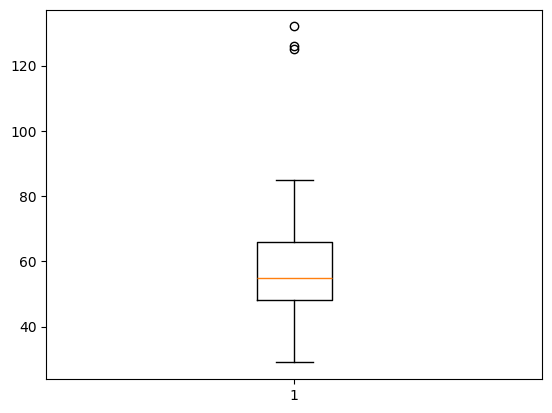

In [142]:
plt.figure()
plt.boxplot(marketing_data.Age)
plt.show()

In [143]:
#Remove ages over 100
marketing_data = marketing_data[marketing_data.Age<100]

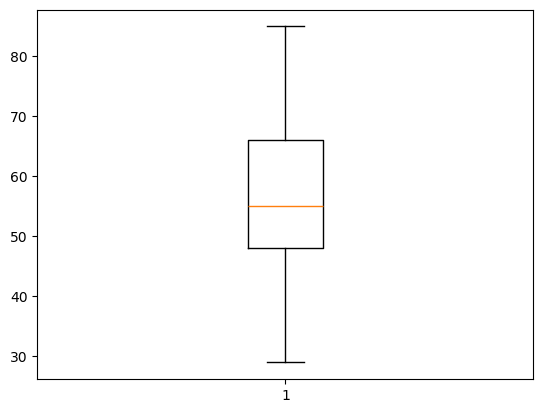

In [144]:
plt.figure()
plt.boxplot(marketing_data.Age)
plt.show()

In [145]:
marketing_data.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [146]:
#New dataframes based on education levels
marketing_data_grad = marketing_data[marketing_data.Education == 'Graduation']
marketing_data_PhD = marketing_data[marketing_data.Education == 'PhD']
marketing_data_2n = marketing_data[marketing_data.Education == '2n Cycle']
marketing_data_master = marketing_data[marketing_data.Education == 'Master']
marketing_data_basic = marketing_data[marketing_data.Education == 'Basic']

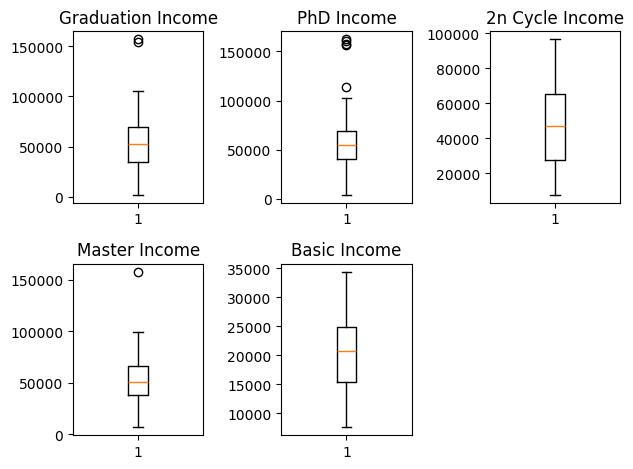

In [147]:
plt.subplot(2, 3, 1)
plt.boxplot(marketing_data_grad.Income)
plt.title('Graduation Income')
plt.subplot(2, 3, 2)
plt.boxplot(marketing_data_PhD.Income)
plt.title('PhD Income')
plt.subplot(2, 3, 3)
plt.boxplot(marketing_data_2n.Income)
plt.title('2n Cycle Income')
plt.subplot(2, 3, 4)
plt.boxplot(marketing_data_master.Income)
plt.title('Master Income')
plt.subplot(2, 3, 5)
plt.boxplot(marketing_data_basic.Income)
plt.title('Basic Income')
plt.tight_layout()
plt.show()

<ipython-input-148-c4e1d1b34488>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  marketing_data.hist(ax = ax)


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'YearBirth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>],
       [<Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProducts'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>],
       [<Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>]

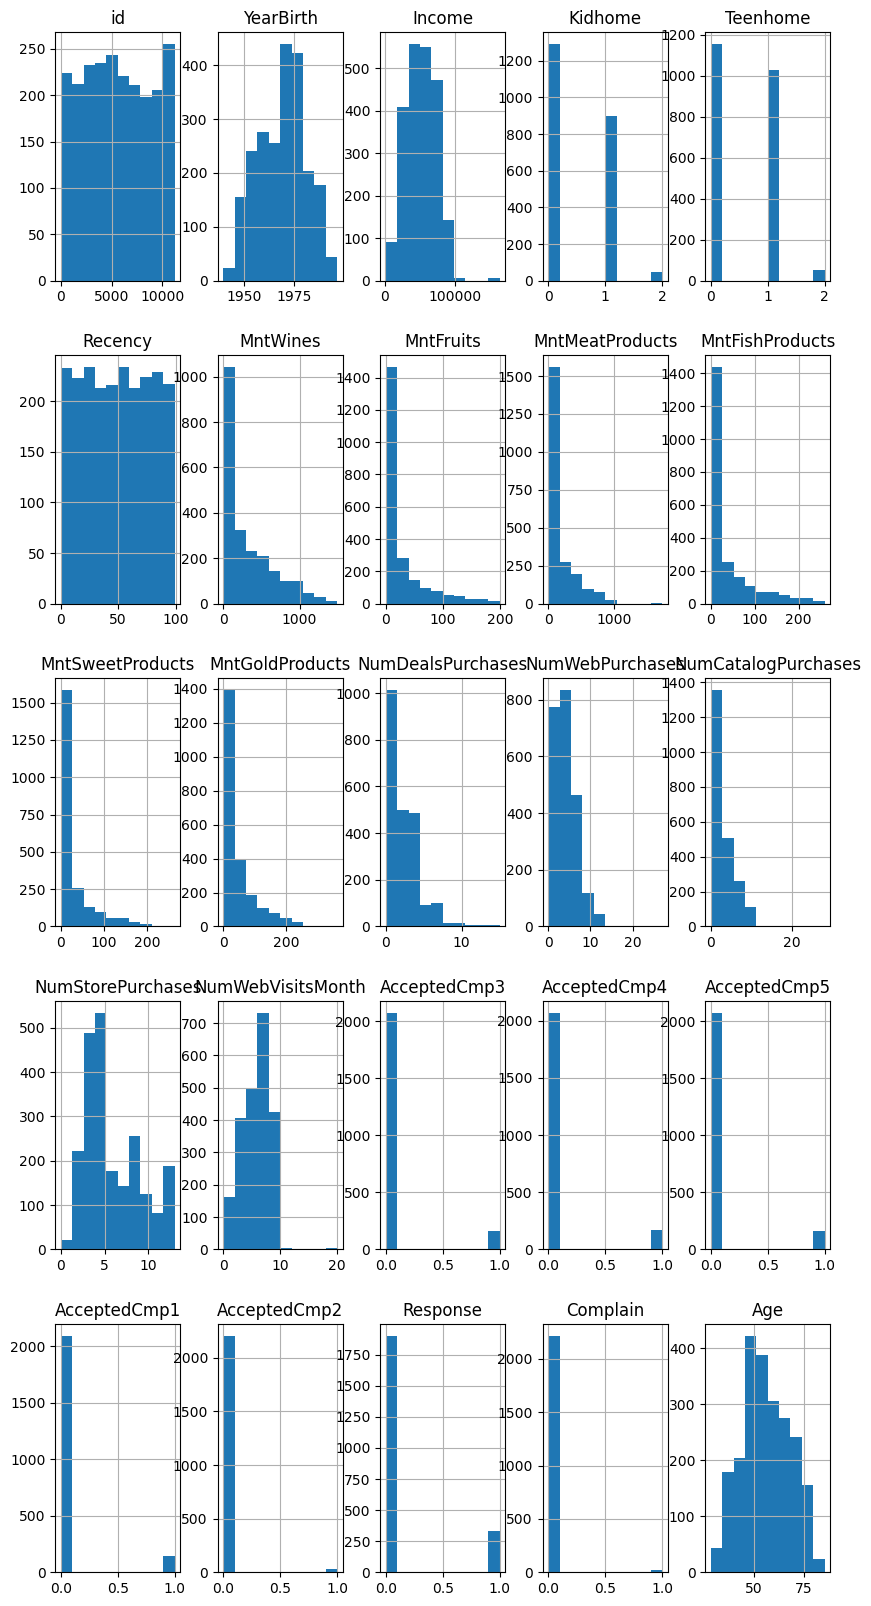

In [148]:
#Looking at data skews
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax)

In [149]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2236 non-null   int64  
 1   YearBirth            2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   MaritalStatus        2236 non-null   object 
 4   Income               2236 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   DtCustomer           2236 non-null   object 
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProducts      2236 non-null   int64  
 15  NumDealsPurchases    2236 non-null   int64 

In [150]:
#I need to drop these columns for the correlation function to work
new_marketing_data = marketing_data.drop(['Education', 'MaritalStatus', 'DtCustomer', 'Country'], axis=1)

In [151]:
new_marketing_data.head()

,id,YearBirth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
0,1826,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,55
1,1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,64
2,10476,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,67
3,1386,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,58
4,5371,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,36


In [152]:
new_marketing_data.corr()

,id,YearBirth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
id,1.000000,0.002659,0.000916,0.001656,-0.003052,-0.046300,-0.020726,0.007247,-0.002274,-0.022903,-0.006112,-0.010339,-0.037393,-0.017712,-0.001592,-0.013613,-0.008256,-0.035823,-0.025150,-0.004916,-0.021392,-0.014970,-0.021596,0.031580,-0.002659
YearBirth,0.002659,1.000000,-0.198889,0.233894,-0.363172,-0.019396,-0.162809,-0.013657,-0.030729,-0.042359,-0.019379,-0.057419,-0.068286,-0.153873,-0.125285,-0.139237,0.117498,0.061107,-0.064261,0.015411,-0.008146,-0.007621,0.018557,-0.004450,-1.000000
Income,0.000916,-0.198889,1.000000,-0.510263,0.034376,0.007963,0.685944,0.504859,0.684170,0.518381,0.518161,0.383593,-0.107140,0.450579,0.693660,0.627943,-0.646426,-0.015186,0.217743,0.394258,0.325288,0.104012,0.160990,-0.027912,0.198889
Kidhome,0.001656,0.233894,-0.510263,1.000000,-0.035339,0.007964,-0.496166,-0.372442,-0.436901,-0.387404,-0.370486,-0.349462,0.221489,-0.361982,-0.502331,-0.500192,0.447626,0.014739,-0.161686,-0.204918,-0.172435,-0.081760,-0.080005,0.036336,-0.233894
Teenhome,-0.003052,-0.363172,0.034376,-0.035339,1.000000,0.016746,0.005047,-0.176117,-0.261171,-0.204177,-0.162527,-0.020447,0.388293,0.155649,-0.110551,0.050177,0.134636,-0.042949,0.038680,-0.190383,-0.140426,-0.015715,-0.154941,0.007553,0.363172
Recency,-0.046300,-0.019396,0.007963,0.007964,0.016746,1.000000,0.016321,-0.003717,0.023446,0.001314,0.022796,0.017168,-0.000638,-0.010776,0.025226,0.000771,-0.021850,-0.033095,0.018779,0.000844,-0.019367,-0.001811,-0.198781,0.005361,0.019396
MntWines,-0.020726,-0.162809,0.685944,-0.496166,0.005047,0.016321,1.000000,0.388472,0.561886,0.398956,0.385845,0.386234,0.011173,0.542136,0.634716,0.642313,-0.320287,0.062103,0.373491,0.471949,0.354328,0.206031,0.247280,-0.035974,0.162809
MntFruits,0.007247,-0.013657,0.504859,-0.372442,-0.176117,-0.003717,0.388472,1.000000,0.542030,0.594415,0.567030,0.389999,-0.131792,0.296986,0.487274,0.463136,-0.417405,0.014945,0.010363,0.211996,0.195351,-0.009717,0.125854,-0.002813,0.013657
MntMeatProducts,-0.002274,-0.030729,0.684170,-0.436901,-0.261171,0.023446,0.561886,0.542030,1.000000,0.567813,0.523329,0.348727,-0.122242,0.293502,0.723473,0.479983,-0.539183,0.018250,0.102981,0.372173,0.310053,0.043060,0.236548,-0.020750,0.030729
MntFishProducts,-0.022903,-0.042359,0.518381,-0.387404,-0.204177,0.001314,0.398956,0.594415,0.567813,1.000000,0.579490,0.422018,-0.139263,0.293424,0.533969,0.459997,-0.445729,0.000302,0.016797,0.198112,0.260866,0.002555,0.111325,-0.018842,0.042359


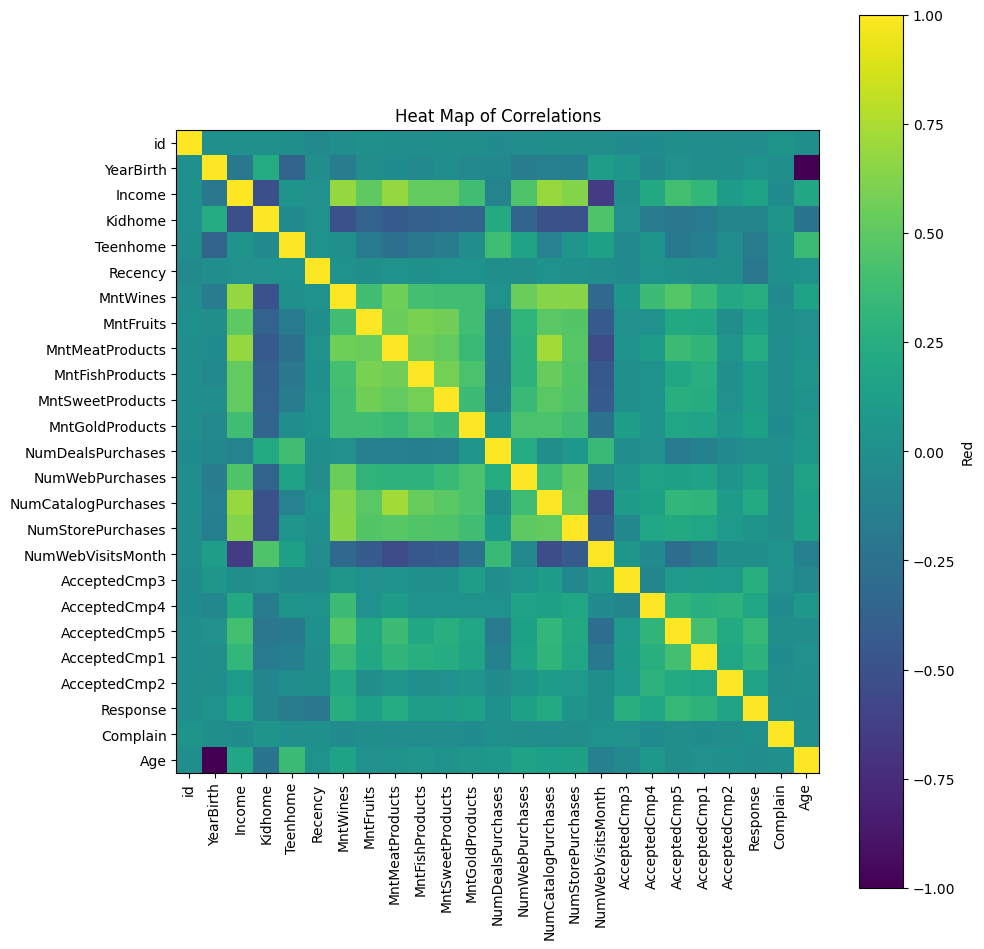

In [153]:
plt.figure(figsize=(10,10))
plt.imshow(new_marketing_data.corr(), cmap='viridis')
plt.colorbar(label='Red')
plt.xticks(range(len(new_marketing_data.corr().columns)),new_marketing_data.corr().columns, rotation=90)
plt.yticks(range(len(new_marketing_data.corr().columns)),new_marketing_data.corr().columns)
plt.tight_layout()
plt.title('Heat Map of Correlations')
plt.show()

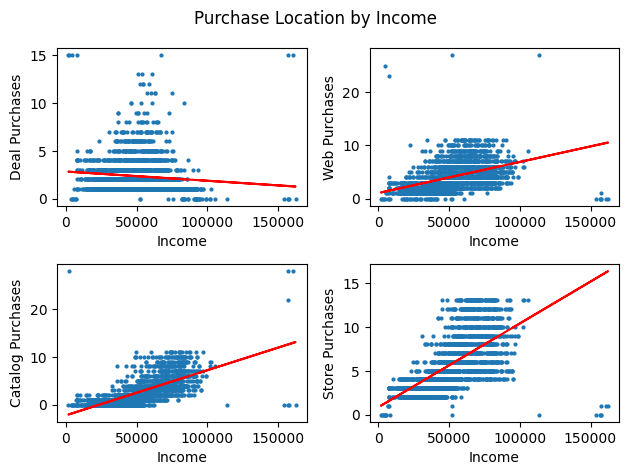

In [154]:
#Scatter plots of locations where items have been purchased.
plt.subplot(2,2,1)
plt.scatter(marketing_data.Income, marketing_data.NumDealsPurchases, s=4)
a, b = np.polyfit(marketing_data.Income, marketing_data.NumDealsPurchases, 1)
plt.plot(marketing_data.Income, a*marketing_data.Income+b, color ='red')
plt.xlabel('Income')
plt.ylabel('Deal Purchases')
plt.subplot(2,2,2)
plt.scatter(marketing_data.Income, marketing_data.NumWebPurchases, s=4)
c, d = np.polyfit(marketing_data.Income, marketing_data.NumWebPurchases, 1)
plt.plot(marketing_data.Income, c*marketing_data.Income+d, color ='red')
plt.xlabel('Income')
plt.ylabel('Web Purchases')
plt.subplot(2,2,3)
plt.scatter(marketing_data.Income, marketing_data.NumCatalogPurchases, s=4)
e, f = np.polyfit(marketing_data.Income, marketing_data.NumCatalogPurchases, 1)
plt.plot(marketing_data.Income, e*marketing_data.Income+f, color ='red')
plt.xlabel('Income')
plt.ylabel('Catalog Purchases')
plt.subplot(2,2,4)
plt.scatter(marketing_data.Income, marketing_data.NumStorePurchases, s=4)
g, h = np.polyfit(marketing_data.Income, marketing_data.NumStorePurchases, 1)
plt.plot(marketing_data.Income, g*marketing_data.Income+h, color ='red')
plt.xlabel('Income')
plt.ylabel('Store Purchases')
plt.suptitle("Purchase Location by Income")
plt.tight_layout()
plt.show()

In [155]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data.NumDealsPurchases+marketing_data.NumWebPurchases + marketing_data.NumCatalogPurchases + marketing_data.NumStorePurchases

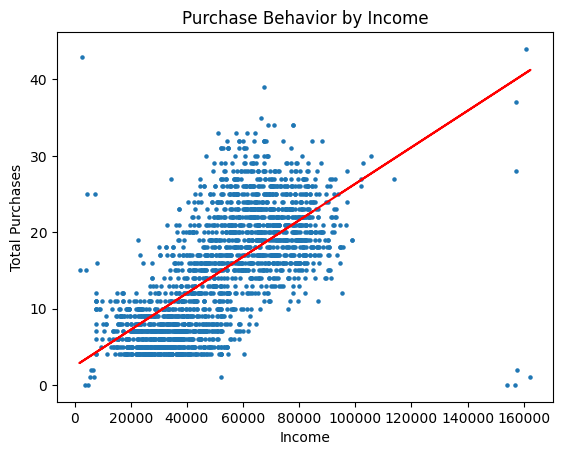

In [156]:
#Scatterplot of total purchases
plt.scatter(marketing_data.Income, marketing_data.total_purchases, s=5)
a, b = np.polyfit(marketing_data.Income, marketing_data.total_purchases, 1)
plt.plot(marketing_data.Income, a*marketing_data.Income+b, color ='red')
plt.xlabel('Income')
plt.ylabel('Total Purchases')
plt.title('Purchase Behavior by Income')
plt.show()

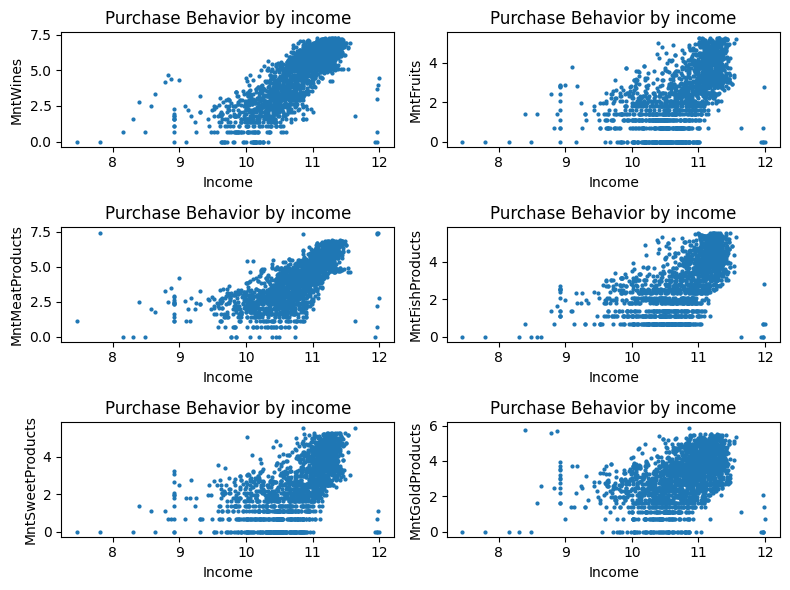

In [157]:
# Used a for loop because it was easier.
# Scatterplot of items purchased by income levels
amounts_list = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]
plot = 0
fig = plt.figure(figsize=(8,6))

for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    plt.scatter(np.log(marketing_data.Income), np.log(marketing_data[amounts_list[i]]), s=4)
    plt.xlabel('Income')
    plt.ylabel(amounts_list[i])
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()


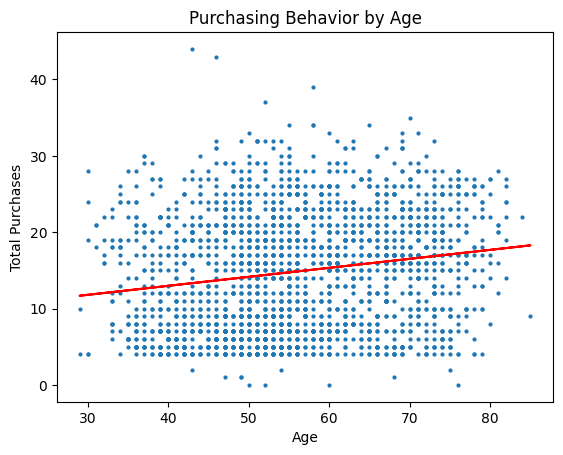

In [158]:
plt.figure()
# scatterplot of total purchases vs. age
plt.scatter(marketing_data["Age"], marketing_data["total_purchases"], s=4)
a, b = np.polyfit(marketing_data.Age, marketing_data.total_purchases, 1)
plt.plot(marketing_data.Age, a*marketing_data.Age+b, color ='red')
plt.xlabel('Age')
plt.ylabel('Total Purchases')
plt.title("Purchasing Behavior by Age")
plt.show()

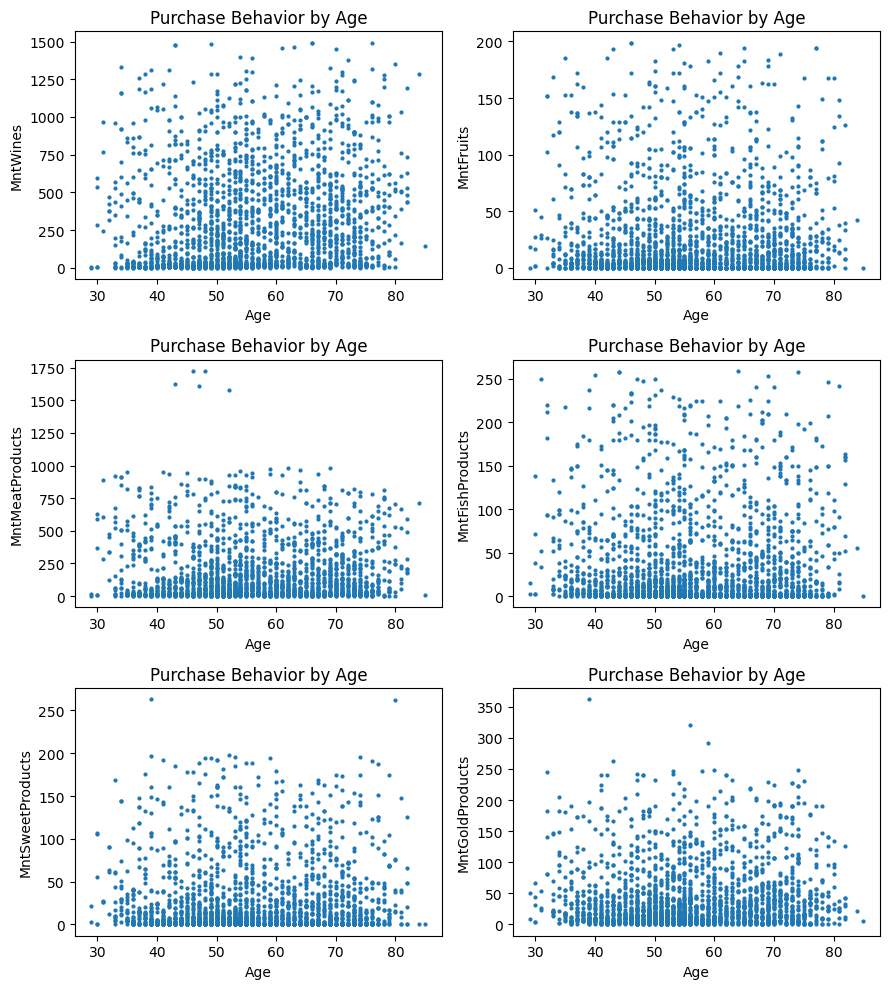

In [159]:
# scatterplots of items purchased by age
amounts_list = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]
plot = 0
fig = plt.figure(figsize=(9,10))

for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    plt.scatter((marketing_data.Age), (marketing_data[amounts_list[i]]), s=4)
    plt.xlabel('Age')
    plt.ylabel(amounts_list[i])
    plt.title("Purchase Behavior by Age")
plt.tight_layout()
plt.show()

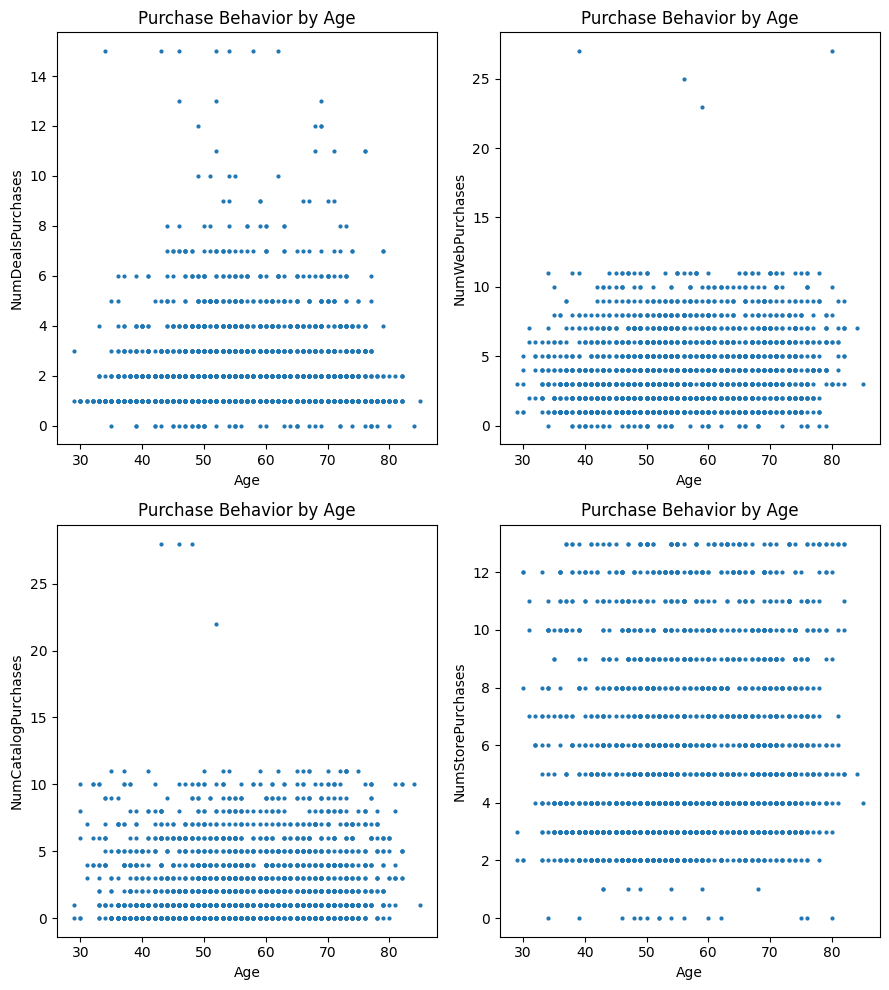

In [160]:
# Scatterplots of items purchased by age.
amounts_list = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    plt.scatter((marketing_data.Age), (marketing_data[amounts_list[i]]), s=4)
    plt.xlabel('Age')
    plt.ylabel(amounts_list[i])
    plt.title("Purchase Behavior by Age")
plt.tight_layout()
plt.show()

In [161]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

# applying the function to the dataframe
marketing_data['age_group'] = marketing_data['Age'].apply(age_groups)
    

In [162]:
category_counts = marketing_data['age_group'].value_counts()

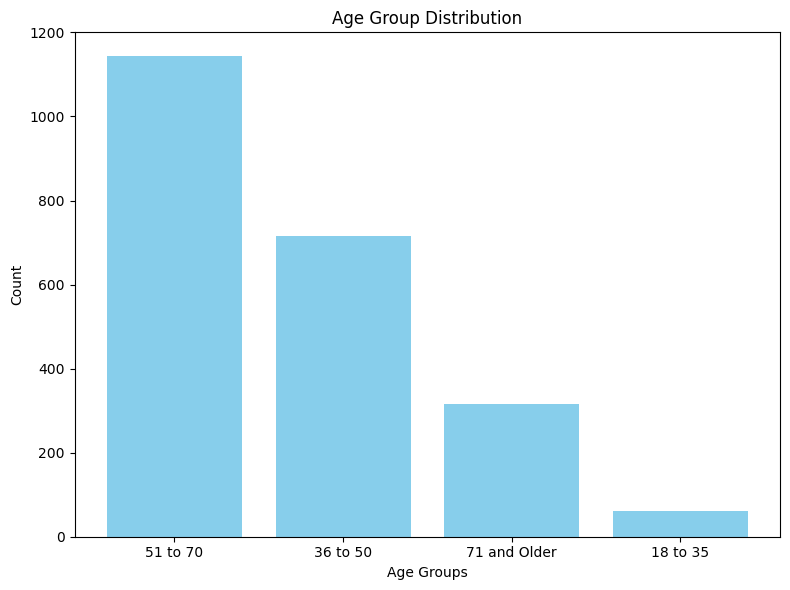

In [163]:
#bar graph of total purchases by age groups
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.tight_layout()
plt.show()

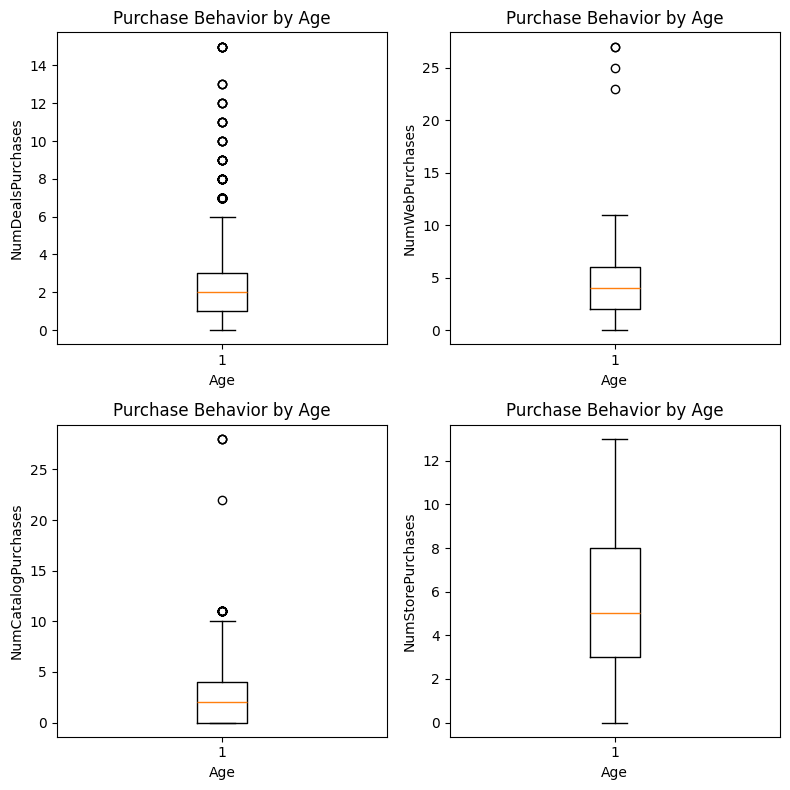

In [164]:
#Box and Whisker of locations purchased at and age
amounts_list = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    plt.boxplot(marketing_data[amounts_list[i]])
    plt.xlabel('Age')
    plt.ylabel(amounts_list[i])
    plt.title("Purchase Behavior by Age")
plt.tight_layout()
plt.show()

In [165]:
# new dataframe that is age and purchase amounts columns
age_plus_amounts = marketing_data.loc[:, ("Age", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts")]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.Age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()

<ipython-input-165-cf06eaf2b7d7>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()


In [166]:
print(age_plus_amounts)

      age_group    Age  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0      18 to 35   2030     20319       2360            17752             3245   
1      36 to 50  31841    171860      18299           110279            26028   
2      51 to 70  67991    362587      29343           182810            40522   
3  71 and Older  23582    125263       8751            62534            14136   

   MntSweetProducts  MntGoldProducts  
0              2161             3608  
1             19117            28948  
2             29554            49407  
3              9720            16383  


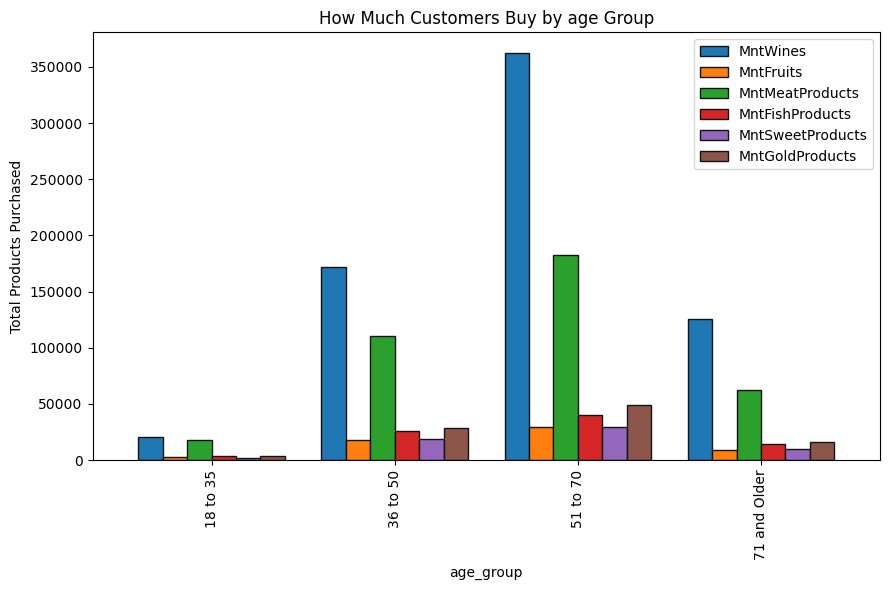

In [167]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

Findings:
1st: Income has a positive and strong correlation with number of purchases.
2nd: Those with bachelor's degrees or higher make roughly the same as one another.
3rd: Those with bachelor's degrees or higher have higher incomes on average than those who don't.
4th: Deal purchases have an extremely weak correlation with income.
5th: Age groups of 51-70 and 36-50 purchase the most.
6th: Age groups of 51-70 and 36-50 purchase large amounts of wine and meat.